# Pandas First Steps

## Install

`conda install pandas`

OR

`pip install pandas`

OR 

`!pip install pandas` (Jupyter notebook)

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


## Import

`import pandas as pd`

In [2]:
import pandas as pd

In [3]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}

Passing the data to the pandas DataFrame constructor

In [4]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


Let's have customer names as our indexes:

In [5]:
purchases = pd.DataFrame(data, index=['Olvar', 'Francisco', 'Kevin', 'Ramalakshmi'])

purchases

,apples,oranges
Olvar,3,0
Francisco,2,3
Kevin,0,7
Ramalakshmi,1,2


So now we could **loc**ate a customer's order by using their name

In [6]:
purchases.loc['Kevin']

apples     0
oranges    7
Name: Kevin, dtype: int64

## How to read in data

Here, we'll see how to load data from various file formats into a DataFrame. It's quite simple with pandas.

### Reading data from CSVs



In [13]:
df = pd.read_csv('sample-data/purchases.csv')

df

,Unnamed: 0,apples,oranges
0,Olvar,3,0
1,Francisco,2,3
2,Kevin,0,7
3,Ramalakshmi,1,2


CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [14]:
df = pd.read_csv('sample-data/purchases.csv', index_col=0)

df

,apples,oranges
Olvar,3,0
Francisco,2,3
Kevin,0,7
Ramalakshmi,1,2


### Reading data from JSON

If you have a JSON file - which is essentially a stored Python dict - pandas can read a JSON file just as easily:

In [15]:
df = pd.read_json('sample-data/purchases.json')

df

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


Using JSON allows indexes to work through nesting. Pandas will try to figure out how to create a DataFrame by analyzing structure structure of you JSON.

**Note** - Sometimes pandas doesn't get the structure of the DataFrame right. You'll need to set the `orient` keyword argument depending on the structure of your JSON.

In [16]:
df = pd.read_json('sample-data/purchases-per-person.json')

df

,Olvar,Francisco,Kevin,Ramalakshmi
apples,3,2,0,1
oranges,0,3,7,2


In [17]:
df = pd.read_json('sample-data/purchases-per-fruit.json')

df

,apples,oranges
Olvar,3,0
Francisco,2,3
Kevin,0,7
Ramalakshmi,1,2


### Reading data from a SQL database

If you're working with data from a SQL database you need to first establish a connection to the database using an appropriate Python library (connector/driver). Then we'll pass a query to pandas.

In [18]:
%pip install mysql.connector

  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp38-cp38-win_amd64.whl size=247943 sha256=0a8b83b120395a07463cd2e132301cfac5b201281501b13f729c6a9f17417cec
  Stored in directory: c:\users\akash\appdata\local\pip\cache\wheels\57\e4\98\5feafb5c393dd2540e44b064a6f95832990d543e5b4f53ea8f
Successfully built mysql.connector
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\ProgramData\\Anaconda3\\Lib\\site-packages\\mysql\\__init__.py'
Consider using the `--user` option or check the permissions.



In [ ]:
# connect with the database
cnx = ""

In [ ]:
df = pd.read_sql_query("SELECT * FROM employees", cnx)

df

## Converting back to CSV, JSON, or SQL

So, after extensive work on cleaning your data, you're now ready to save it as a file of your choice. Similar tp the ways we read in data, pandas provides intuitive commands to save it:

In [ ]:
df.to_csv('output-data/new_purchases.csv')

df.to_json('output-data/new_purchases.json')

df.to_sql('new_purchases', cnx)

# Most important DataFrame operations

Let's move on to importing some real-world data and detailing a few of the operations you'll be using a lot.

Let's load in the IMDB movies dataset to begin:

In [23]:
movies_df = pd.read_csv("datasets/IMDB-Movie-Data.csv", index_col="Title")

movies_df.head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [22]:

movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [24]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [25]:
movies_df.shape

(1000, 11)

## Handling duplicates

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself:

In [28]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(2000, 11)

Using `append()` will return a copy without affecting the original DataFrame.

Now we can try dropping the duplicates:

In [29]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(1000, 11)

Just like `append()`, the `drop_duplicates()` method will also return a copy of your DataFrame, but this time with the duplicates removed.

We can also use the `inplace` keyword argument of pandas on many of its methods to reduce code verbosity of the commands. Using `inplace=True` will modify the DataFrame object in place instead:

In [31]:
temp_df.drop_duplicates(inplace=True)

temp_df.shape

(1000, 11)

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:
- `first`: (default) Drop duplicates except the first occurrence.
- `last`: Drop duplicates except the last occurrence.
- `False`: Drop all duplicates.

## Column cleanup

Many times datasets will have verbose column names with symbols, upper and lower case words, spaces, and typos. To make selecting the data by column name easier, we can spend a little time cleaning up their names.


In [32]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

We can use the `.rename()` method to rename certain or all columns via a `dict`. We don't want parantheses, so let's rename those:

In [33]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)

movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

But what if we want to lower the casing of all the column names? Instead of using `.rename()`. we could also set a list of names to the columns like so:

In [35]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

But that's too much work. Instead of just renaming each column manually we can do a list comprehension:

In [36]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

## How to work with missing values

When exploring data, you'll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which are handled differently in some situations.

There are two options in dealing with nulls:
1. Get rid of rows or columns with nulls
2. Replace nulls with non-null values, a technique is known as imputation

Let's calculate the total number of nulls in each column of our dataset. The first step is to check which cells in our DataFrame are null:

In [34]:
movies_df.isnull()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


In [37]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

### Removing null values

Removing null data is only suggested if you have a small amount of missing data.

In [38]:
movies_df.dropna()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


This operation will delete any **row** with at least a single null value, but it will return a new DataFrame without altering the original one. You could specify `inplace=True` in this method as well.

Dropping entire rows seems like a waste since there's perfectly good data in the other columns of those dropped rows. That's why we'll look at imputation next.

Other than just dropping rows, you could also drop columns with null values by setting `axis=1`:

In [39]:
movies_df.dropna(axis=1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


### Imputation

Imputation is a conventional feature engineering technique used to keep valuable data that have null values. It refers to replaccing null values with non-null values.

There may be instances where dropping every row with a null value removes too big a chunk of data from your dataset, so instead we can impute that null with another value, usually the **mean**, or the **median** of that column.

Let's look at imputing the missing values in the `revenue_millions` column. First we'll extract that column into its own variable:

In [41]:
revenue = movies_df['revenue_millions']

Using square brackets is the genral way we select columns in a DataFrame.

When we created DataFrames from scratch a while ago, the keys of the `dict` ended up as column names. Now when we select columns of a DataFrame, we use brackets just like if we were accessing a Python dictionary.

`revenue` now contains a Series:

In [42]:
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

SLightly different formatting than a DataFrame, but we still have our `Title` index.

We'll impute the missing values of revenue using the mean. Here's the mean value:

In [43]:
revenue_mean = revenue.mean()

revenue_mean

82.95637614678897

With the mean, let's fill the nulls using `fillna()`:

In [44]:
revenue.fillna(revenue_mean, inplace=True)

We have now replaced all nulls in `revenue` with the mean of the column. 

In [45]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Imputing an entire column with the same value like the mean is a basic example. It would be a better idea to try a more granular imputation by `Genre` or `Director`.

For example, you would find the mean of the revenue generated in each genre individually and impute the nulls in each genre with that genre's mean.

### Understanding your variables

Using `describe()` on an entire DataFrame we can get a summary of the distribution continuous variables:

In [46]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Understanding which numbers are continuous also comes in handy when thinking about the type of plot to use to represent your data visually.

`.describe()` can be used on categorical variable to get the count of rows, unique count of categories, top category, and freq of top category:

In [47]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

This tells us that the genre column has 207 unique values, the top value is Action/Adventure/Sci-Fi, which shows up 50 times (freq).

`.value_counts()` can tell us the frequency of all values in a column:

In [48]:
movies_df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

### Relationships between continuous variables

By using the correlation method `.corr()`, we can generate the relationship between each continuous variable:

In [49]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


Correlation tables are a numerical representation of the bivariate relationships in the dataset.

Positive numbers indicate a positive correlation - one goes up, the other goes up - and negative numbers represent an inverse correlation - one goes up, the other goes down. **1.0** indicates a perfect correlation.

So looking in the first row, first column, we see `rank` has a perfect correlation with itself, which is obvious. On the other hand, the correlation between `votes` and `revenue_millions` is 0.6.

Examining bivariate relationships comes in handy when you have an outcome or dependent variable in mind and would like to see the features most correlated to the increase or decrease of the outcome. You can visually represent bivariate relationships with scatterplots.

## DataFrame slicing, selecting, extracting

### By column

In [50]:
genre_col = movies_df['genre']

type(genre_col)

pandas.core.series.Series

This will return a *Series*. To extract a column as a DataFrame, you need to pass a list of column names. In our case that's just a single column:

In [51]:
genre_col = movies_df[['genre']]

type(genre_col)

pandas.core.frame.DataFrame

In [52]:
subset = movies_df[['genre', 'rating']]

subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


### By row

For rows, we have two options:
- `.loc` - **loc**ates by name
- `iloc` - **loc**ates by numerical index

In [53]:
prom = movies_df.loc["Prometheus"]

prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

In [55]:
prom = movies_df.iloc[1]

prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

`loc` and `iloc` can be thought of as similar to Python `list` slicing. To show this even further, let's select multiple rows.

In [56]:
movie_subset = movies_df.loc['Prometheus':'Sing']

movie_subset = movies_df.iloc[1:4]

movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


One important distinction using `.loc` and `.iloc` to select multiple rows is that `.loc` includes the movie *Sing* in the result, but when using `.iloc`, we're getting rows 1:4 but the movie at index 4 (*Suicide Squad*) is not included.

Slicing with `.iloc` follows the same rules as slicing with lists, the object at the index at the end is not included.

### Conditional selections

For example, what if we want to filter our movies DataFrame to show only films that are directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. 

In [57]:
condition = (movies_df['director'] == "Ridley Scott")

condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

Similar to the `isnull()`, this returns a Series of True and False values; True for films directed by Ridley Scott and False for the ones that are not directed by him.

We want to filter out all movies not directed by Ridley Scott, in other words, we don't want the False films. Therefore, we must only return the rows where that condition is True.

In [58]:
movies_df[movies_df['director'] == "Ridley Scott"]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


We can read the above conditional as:

`SELECT * FROM movies_df WHERE movies_df.director = "Ridley Scott"`

Let's look at conditional selections using numerical values by filtering the DataFrame by ratings:

In [59]:
movies_df[movies_df['rating'] >= 8.6].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Kimi no na wa,97,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN


We can make some richer conditionals by using logical operators `|` for "or" and `&` for "and".

In [60]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


The above command filters the DataFrame to show only movies director by Christopher Nolan OR Ridley Scott.

We need to make sure to group evaluations with parantheses so Python knows how to evaluate the conditional.

Using the `isin()` method to make the above operation more concise.

In [61]:
movies_df[movies_df['director'].isin(["Christopher Nolan", "Ridley Scott"])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Let's say we want all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

Here's how we would do all of that:

In [62]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


When we use `describe()`, the 25th percentile for revenue comes out to be 17.442500, and we can access the value directly by using the quantile() method with a float of 0.25.

## Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so - especially on large datasets - is very slow.

An efficient alternative to iterating over a DataFrame is to `apply()` a function to the dataset. 

For example, we could use a function to convert movies with an 8.0 or greater ratings to a string value of "good", and the rest to "bad" and use this transformed values to create a new column.

First, we could create a function that, when given a rating, determines if it's good or bad:

In [64]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what `apply()` does:

In [65]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


The `apply()` method passes every value in the `rating` column through the `rating_function` and then returns a new Series. The Series is then assigned to a new column called `rating_category`.


You can also use anonymous functions as well. 

The following lambda function ahieves the same result as `rating_function`:

In [66]:
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


Overall, using `apply()` will be much faster than iterating manually over rows because pandas is utilizing vectorization.

Vectorization is a style of computer programming where operations are applied to whole arrays instead of individual elements.

A good example of high usage of `apply()` is during natural language processing (NLP) work. You'll need to apply all sorts of cleaning functions to strings to prepare them for machine learning.

## Brief Plotting

Since pandas integrates with Matplotlib, so you get the ability to plot directly off DataFrames and Series.

To get started we need to install and import Matplotlib:

In [67]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

**Plotting Tip**

For categorical variables, utilize Bar Charts* and Boxplots.

For continuous variables, utilize Histograms, Scatterplots, Line graphs, and Boxplots.

Let's plot the relationship between ratings and revenue. All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot.

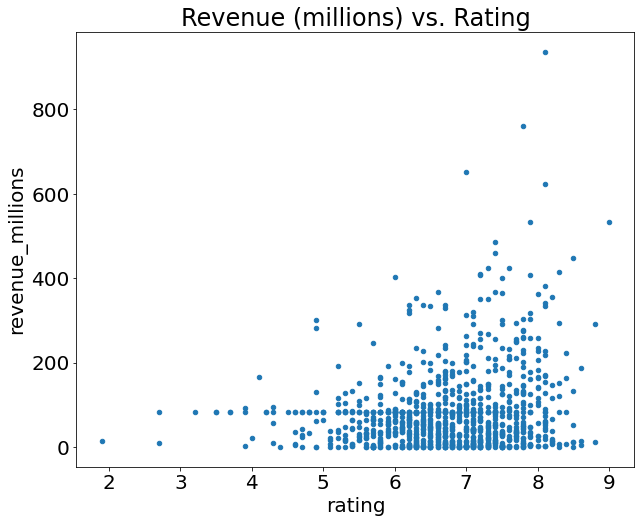

In [69]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs. Rating' );

We can hide the `<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18>` output when plotting Jupyter notebooks by using a semicolon at the end of the command.

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

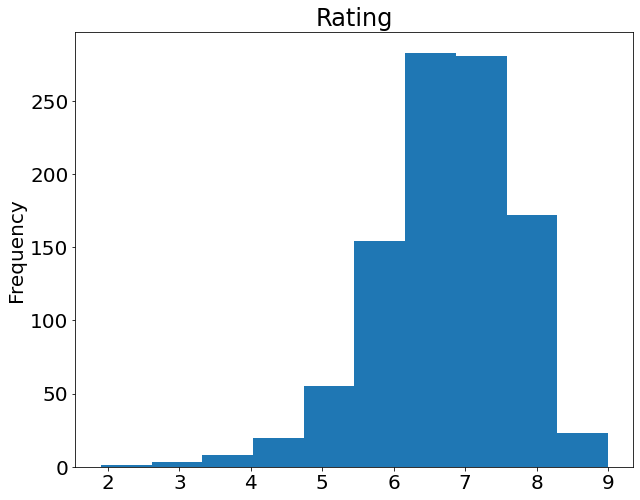

In [71]:
movies_df['rating'].plot(kind='hist', title='Rating');

One of the infotmation that `.describe()` gives us is the interquantile range.

Let's recall what `describe()` gives us on the ratings column.

In [72]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

There's a graphical representation of the interquantile range, called the **Boxplot**.

Using a Boxplot we can visualise this data:

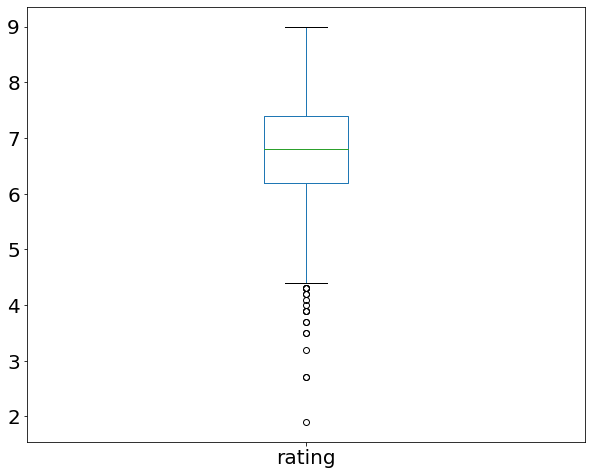

In [74]:
movies_df['rating'].plot(kind='box');

![boxplot-explanation](https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif)

By combining categorical and continuous data, we cam create a Boxplot of revenue that is grouped by the Rating Category we created above:

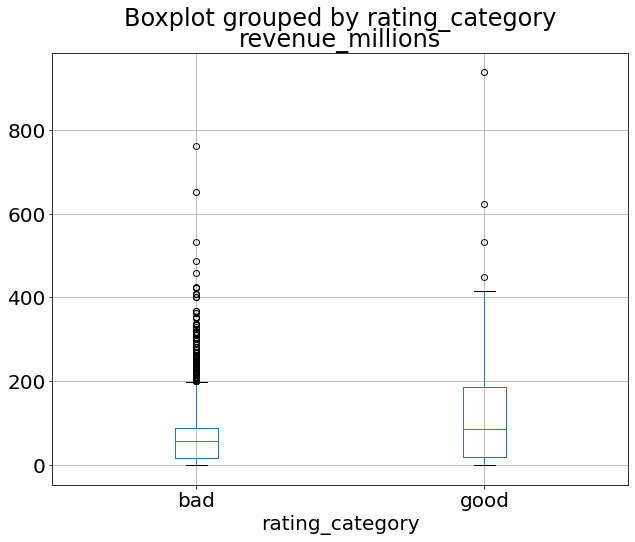

In [75]:
movies_df.boxplot(column='revenue_millions', by='rating_category');